In [147]:
import string
import pandas as pd
import numpy as np
import nltk
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

result=string.punctuation
print(result)
df=pd.read_excel(r'G:\TROP ICSU INTERNSHIP\tweets data.xlsx',engine='openpyxl')
df.head()
df.shape


!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


(5960, 3)

In [148]:
##remove punctuations
import re


def remove_url(thestring):
    URLless_string = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','', thestring)
    return URLless_string
df['after_urlremoval']=df['tweet'].apply(lambda x:remove_url(x))

def remove_punctuation(s):
    s = ''.join([i for i in s if i not in frozenset(string.punctuation)])
    return s
df['no_punctuations'] = df['after_urlremoval'].apply(remove_punctuation)
df.head()
#########


,tweet,existence,existence.confidence,after_urlremoval,no_punctuations
0,Global warming report urges governments to act...,Yes,1.0000,Global warming report urges governments to act...,Global warming report urges governments to act...
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,Fighting poverty and global warming in Africa ...,Fighting poverty and global warming in Africa ...
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,Carbon offsets: How a Vatican forest failed to...,Carbon offsets How a Vatican forest failed to ...
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,Carbon offsets: How a Vatican forest failed to...,Carbon offsets How a Vatican forest failed to ...
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,URUGUAY: Tools Needed for Those Most Vulnerabl...,URUGUAY Tools Needed for Those Most Vulnerable...


In [149]:
from nltk.tokenize import RegexpTokenizer



tokenizer=RegexpTokenizer('\w+')
df['after_tokenizer']=df['no_punctuations'].apply(lambda x: tokenizer.tokenize(x.lower()))
df['after_tokenizer'][541]

['coda',
 'automotive',
 'lauded',
 'for',
 'efforts',
 'to',
 'combat',
 'climate',
 'change',
 'air',
 'pollution',
 'link']

In [150]:
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist=stopwords.words('english')
stoplist.append('link')

def remove_stopwords(text):
    words=[w for w in text if w not in stoplist]
    return words
df['stopword']=df['after_tokenizer'].apply(lambda x:remove_stopwords(x))
df.head() 

,tweet,existence,existence.confidence,after_urlremoval,no_punctuations,after_tokenizer,stopword
0,Global warming report urges governments to act...,Yes,1.0000,Global warming report urges governments to act...,Global warming report urges governments to act...,"[global, warming, report, urges, governments, ...","[global, warming, report, urges, governments, ..."
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,Fighting poverty and global warming in Africa ...,Fighting poverty and global warming in Africa ...,"[fighting, poverty, and, global, warming, in, ...","[fighting, poverty, global, warming, africa]"
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,Carbon offsets: How a Vatican forest failed to...,Carbon offsets How a Vatican forest failed to ...,"[carbon, offsets, how, a, vatican, forest, fai...","[carbon, offsets, vatican, forest, failed, red..."
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,Carbon offsets: How a Vatican forest failed to...,Carbon offsets How a Vatican forest failed to ...,"[carbon, offsets, how, a, vatican, forest, fai...","[carbon, offsets, vatican, forest, failed, red..."
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,URUGUAY: Tools Needed for Those Most Vulnerabl...,URUGUAY Tools Needed for Those Most Vulnerable...,"[uruguay, tools, needed, for, those, most, vul...","[uruguay, tools, needed, vulnerable, climate, ..."


In [151]:
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet')
lemmatizer=WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text=[lemmatizer.lemmatize(i) for i in text]
    return lem_text
df['lemmatize']=df['stopword'].apply(lambda x:word_lemmatizer(x))
df.head()

,tweet,existence,existence.confidence,after_urlremoval,no_punctuations,after_tokenizer,stopword,lemmatize
0,Global warming report urges governments to act...,Yes,1.0000,Global warming report urges governments to act...,Global warming report urges governments to act...,"[global, warming, report, urges, governments, ...","[global, warming, report, urges, governments, ...","[global, warming, report, urge, government, ac..."
1,Fighting poverty and global warming in Africa ...,Yes,1.0000,Fighting poverty and global warming in Africa ...,Fighting poverty and global warming in Africa ...,"[fighting, poverty, and, global, warming, in, ...","[fighting, poverty, global, warming, africa]","[fighting, poverty, global, warming, africa]"
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786,Carbon offsets: How a Vatican forest failed to...,Carbon offsets How a Vatican forest failed to ...,"[carbon, offsets, how, a, vatican, forest, fai...","[carbon, offsets, vatican, forest, failed, red...","[carbon, offset, vatican, forest, failed, redu..."
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000,Carbon offsets: How a Vatican forest failed to...,Carbon offsets How a Vatican forest failed to ...,"[carbon, offsets, how, a, vatican, forest, fai...","[carbon, offsets, vatican, forest, failed, red...","[carbon, offset, vatican, forest, failed, redu..."
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087,URUGUAY: Tools Needed for Those Most Vulnerabl...,URUGUAY Tools Needed for Those Most Vulnerable...,"[uruguay, tools, needed, for, those, most, vul...","[uruguay, tools, needed, vulnerable, climate, ...","[uruguay, tool, needed, vulnerable, climate, c..."


In [152]:
from nltk.stem.porter import PorterStemmer
stemmer =PorterStemmer()
def word_stemmer(text):
    stem_text=" ".join([stemmer.stem(i) for i in text])
    return stem_text
df['stem']=df['stopword'].apply(lambda x:word_stemmer(x))
df.head()
df['stem']


0       global warm report urg govern actbrussel belgi...
1                        fight poverti global warm africa
2       carbon offset vatican forest fail reduc global...
3       carbon offset vatican forest fail reduc global...
4                   uruguay tool need vulner climat chang
                              ...                        
5955    bloodlesscoup phrase global warm abandon favor...
5956         virginia investig global warm scientist mann
5957              global warm tube parodi enjoy ipcc ocra
5958    oneey golfer dont dare tell global warm twenty...
5959    man made global warm hair brain theori 4 scien...
Name: stem, Length: 5960, dtype: object

global warm report urg govern actbrussel belgium ap world face increas hunger fight poverti global warm africa carbon offset vatican forest fail reduc global warm carbon offset vatican forest fail reduc global warm uruguay tool need vulner climat chang rt sejorg rt jaymiheimbuch ocean salti show global warm intensifi water cycl global warm evid around usa messag global warm denier doubter look around migratori bird new climat chang strategi stay home southern africa compet limpopo water climat chang bring higher temperatur south global warm impact wheat rice product indialudhiana apr 18 scarciti water seriou solv global warm thing bloga preliminari analysi suggest natur ga could contribut far global warm previous ecoton climat chang popul perspect climat chang blame coastal whale migrat dwindl 並 ventura counti spring storm season start littl late year must global warm govern report say global warm may caus cancer mental ill cnsnewscom earthday global warm could affect patient symptom w

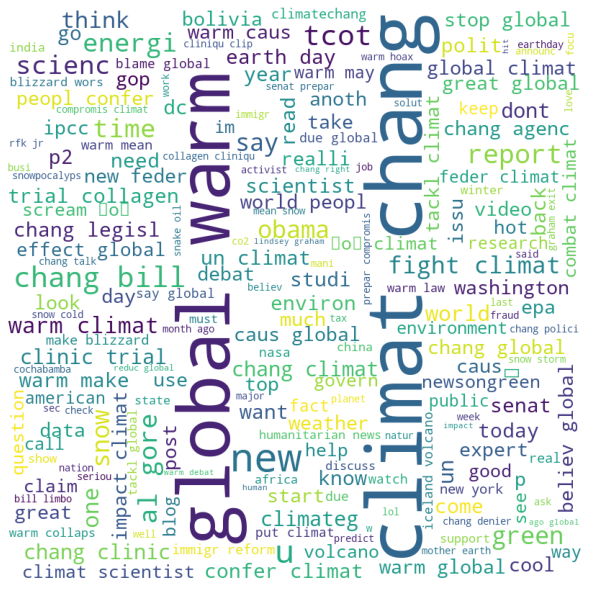

In [153]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
from nltk.corpus import stopwords

comment_words = '' 
stoplist = set(STOPWORDS) 
stoplist.add('rt')
stoplist.add('via')
# iterate through the csv file 
for val in df.stem: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stoplist, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image  
print(comment_words)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

<BarContainer object of 20 artists>

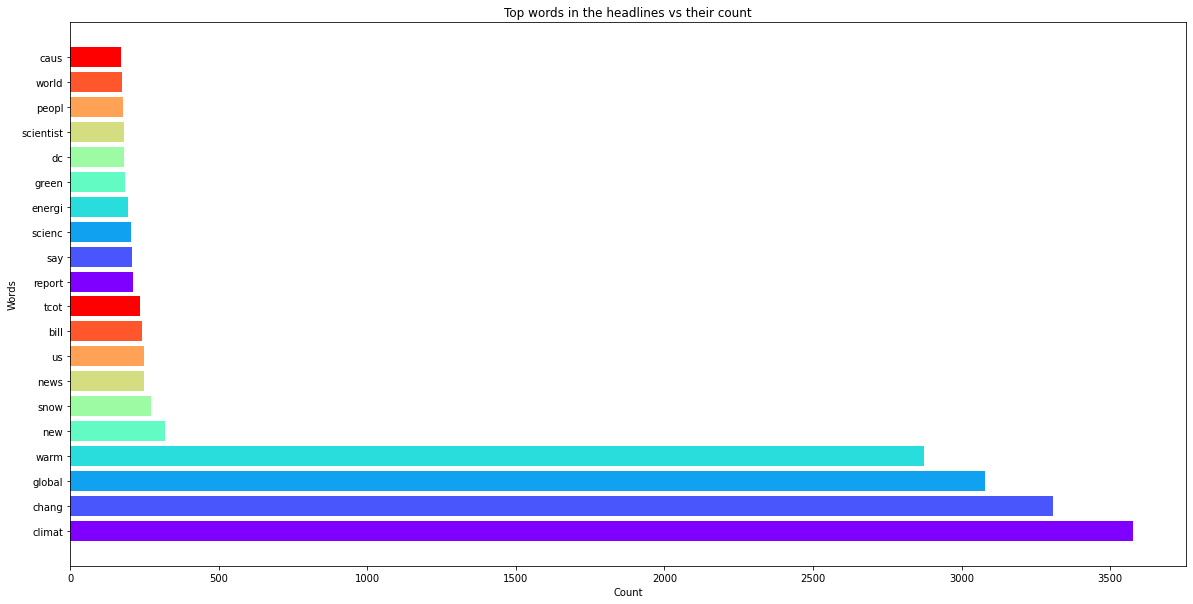

In [154]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
import collections
import matplotlib.cm as cm
from matplotlib import rcParams


filtered_words = [word for word in comment_words.split() if word not in stoplist]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(20):
    words.append(letter)
    counts.append(count)
    colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

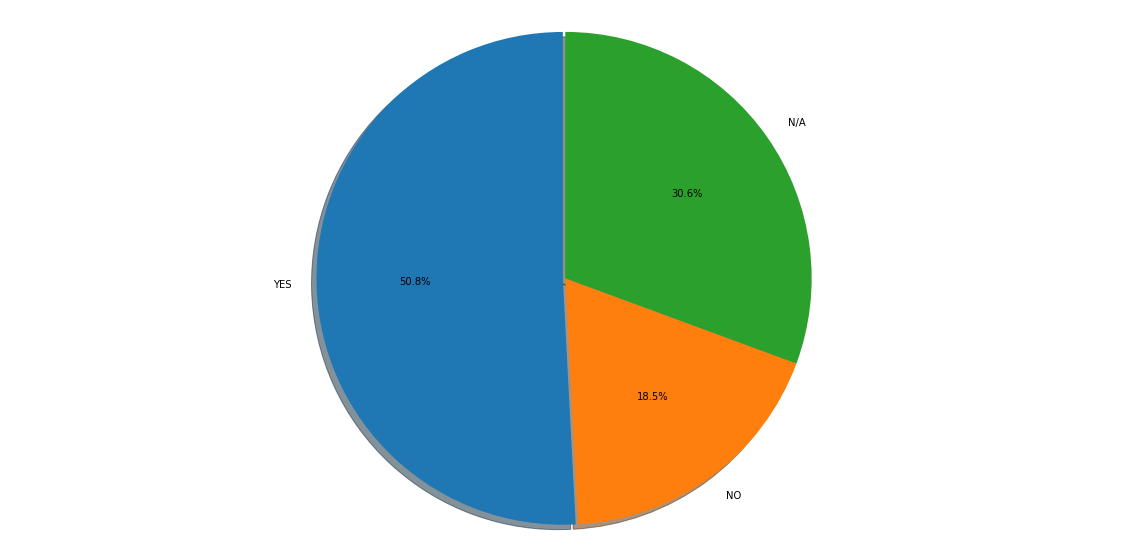

In [144]:

import matplotlib.pyplot as plt


existence= ['YES','NO','N/A'] 
data = [3028,1105,1824] 
explode = (0.01, 0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=existence, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()
